# Model of Production and Oxygen in Aquatic Ecosystems

##### This model relates production, consumption, and recycle including dissolved oxygen and its exchange with the air.

In [ ]:
# impport statements

import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# define variables

# P = rate of production
# R = rate of respiration
# S = inflowing sunlight
# Q = organics stored
# X = dissolved oxygen in water
# N = nutrients available
# Nt = total nutrients
# f = the fraction of available nutrients in organics stored
# Xs = oxygen saturation (ppm)
# X/Xs = fraction of O2 saturation

Text(0.5, 0, 'Time')

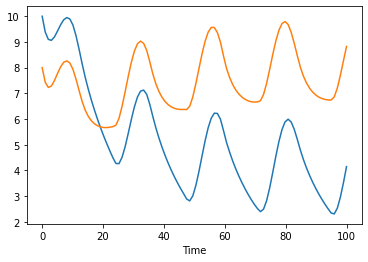

In [ ]:
def NetProd(t, arr):
    Q, X = arr
    k0 = 9
    k1 = 10
    k2 = 10
    k3 = 0.01
    k4 =0.01
    k5 = 1
    S = max(m.sin(t/3.78),0)
    Nt = 1.5
    f = 0.05
    N = max(Nt - f * Q, 0.000001)
    R = S/(1 + k0*N)
    Xs = 8
    DQ = k2*R*N - k4*X*Q
    DX = k1*R*N - k3*X*Q + k5*(1-X/Xs)
    return [DQ,DX]

soln = solve_ivp(NetProd, (0, 100), [10,8], dense_output=True)

t_arr = np.linspace(0,100,100)
plt.plot(t_arr, soln.sol(t_arr).T)
plt.xlabel("Time")
# plt.legend() How do I make legend for array?

Text(0, 0.5, 'Inflowing Sunlight')

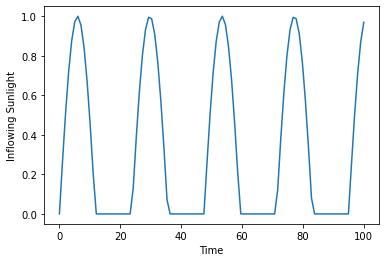

In [ ]:
S = np.sin(t_arr/3.78)
S = np.where(S>0,S,0)
plt.plot(t_arr,S)
plt.xlabel("Time")
plt.ylabel("Inflowing Sunlight")

Text(0, 0.5, 'Nutrients')

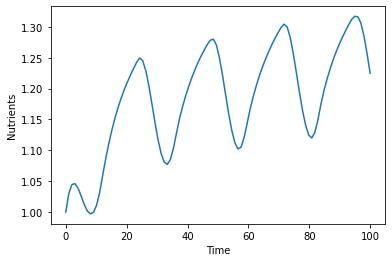

In [ ]:
plt.plot(t_arr,1.5-0.05*soln.sol(t_arr)[0])
plt.xlabel("Time")
plt.ylabel("Nutrients")